# Chapter 4
Welcome to chapter 4! Here I won't be taking too many notes as this chapter highly deals with the mathematics of ML, check out the chapter for all the notes!!!


## Linear Regression
Anywho, let's generate some linear looking data.

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now let's compute theta hat using the normal equation!

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  # add xTheta = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The acutall function used to generate the data is y = 4 + 3x + Gaussian noise

Let's see what we predicted...

In [3]:
print("Pred: ", theta_best)

Pred:  [[4.14538595]
 [2.98151502]]


Would've hopped it had been closer... let's try and make some predictions with Theta hat though!

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("Prediction: ", y_predict)

Prediction:  [[ 4.14538595]
 [10.10841599]]


This doesn't tell use mutch... Let's plot it's predictions!

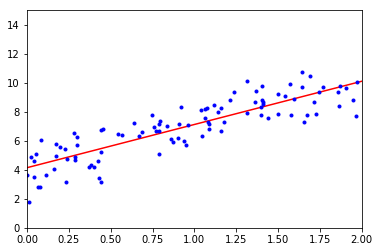

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent Scikit code is the following

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercept: ", lin_reg.intercept_)
print("Coeficient: ", lin_reg.coef_)

print("Our prediction: ", lin_reg.predict(X_new))

Intercept:  [4.14538595]
Coeficient:  [[2.98151502]]
Our prediction:  [[ 4.14538595]
 [10.10841599]]


## Computational Complexity
The Normal Equation computes the inverse of X^T * X, which is typically gives a runtime of O(n^2.4) to O(n^3). This means the Normal Equation gets very slow when the amount of features grow very large.

One the plus side the equation is linear in regards to the instances in the training set O(m), so it handels large training sets efficiently, provided they can fit in memory.

Another plus is once you trianed your model, it's predictions are very fast! Afterall, the computational complexity is linear.

## Gradient Descent
Problems is that we may end up stuck on the local minima!
When using gradient descent, make sure all of the features have the same scale!!!

### Batch Gradient Descent
This uses calculations over the whole trianing set at each Gradient Descent Step! It's the reason why it's called _Batch Gradient Descent_. As a result, it's terribly slow on very large trainging sets (We will see a much faster version shortly).

Here's a quick implementation

In [7]:
eta = 0.1  # Learining rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

Not to hard! Let's look at the resulting theta!

In [8]:
print("Theta: ", theta)

Theta:  [[4.14538595]
 [2.98151502]]


### Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that is uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

At the extreme opposite, _Stochastic Gradient Descent_ just picks a random instance every step and computes the gradient based only on that single instance. This makes it much faster since it has much less data to manipulate every itteration. It makes it possible to train on HUGE datasets since only one instance needs to be in memory at each iterations (SDG can be implemented sa an out-of-core algorithm).

The problem with this algoritm is that it's much less regular and more random the Batch Gradient Descent. Instead of gently going down, it will bounce around a bit, and when it gets close to the minimum, it will continue to bounce around. You end up with good paramaters but not the best.

The bouncing can acutally help to find the local minima, but the bouncing make it not stay! One solution is to gradually reduce the learning rate. This process is called _simulated annealing_. The function that determinse the learning rate at each itteration is called the _learning schedual_.

The following code implements Stochastic Gradeint Descent.

In [9]:
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

We iterate through _m_ iterations, each round called an _epoch_.

In [10]:
print("Theta: ", theta)

Theta:  [[4.08132289]
 [2.99645462]]


Note that since instances are picked randomly, there is a chance that the same instance can be picked twice! To perform Linear Regression using SGD, you can use the `SGDRegressor` class. The following example runs 50 epochs, learning rate of 0.1, default learning schedual, and no regularization.

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/home/marflo356/.local/share/virtualenvs/ml-sci-ten-3-cs4uhT/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Once again, you get a solution very close to the current one.

In [12]:
print("Intercept: ", sgd_reg.intercept_)
print("Coeficient: ", sgd_reg.coef_)

Intercept:  [4.10993394]
Coeficient:  [2.93802555]


### Mini-batch Gradient Descent
Mini-batch is the halfway point between Stochastis Gradient Descent and Batch Gradient Descent, in that it computes gradients on more than 1 but less then all instances! This is typically for GPU optimization, or generally matrix operation optimization. Also called _mini-batches_.

## Polynomial Regression
What if our data is more complex than a simple straight line? We can actually still use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this. This technique is called _Polynomial Regression_.

Let's generate some nonlinear data first, based on a simple quadratic equation (plus some noise).

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

A straight line will never fit this! So, let's use Scikit's `PolynomialFeatures` class to transform our training data, adding the square of each featre in the training set as new features.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("Regular: ", X[0])
print("Polly: ", X_poly[0])

Regular:  [-2.02023988]
Polly:  [-2.02023988  4.08136916]


Now it has both the regular feature and the square feature. Now let's fit a `LinearRegression` model to this!

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept: ", lin_reg.intercept_)
print("Reg: ", lin_reg.coef_)

Intercept:  [1.88507334]
Reg:  [[0.97844412 0.54530664]]


Not bad! Just note that this explodes the number of features like crazy! (n+d)!/(d!n!)
## Learning Curves
Performing high-degree Polynomial Regression will likely fit the training data much more better than a plain Linear Regression model, but it will be much more likely to overfit the data... How can you decide how complex your model should be? How can you tell your model is overfitting or underfitting the data?

Sure you can use CV to evaluate this, but another way to do this is to look at the _learning curves_. To generate this, simply train the model several times on different sized subsets of the training set.

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

Let's look at the learning curves of the plain Linear Regresson model.

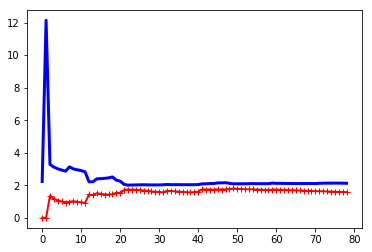

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Analyizing the model shows that when there are just a few instances in the training set, the model can fit them perfectly. However, as new instances are added, it becomes impossible to fit the training data perfectly, both because the data is noisy, and it's not linear at all! The error goes up until it reaches plateau. Adding instances thereafter doesn't make too much sense as the error doesn't change much. Now let's look at performance on the validaition data. At first it is incapable of generalizing properly, which is why the error is so high, but then it plateaus off rather quickly.

These curves are typical of an underfiting model. Both curves have reached plateau; they are close and fairly high. (Try using a more complex model or adding more features!!!)

Let's look at the curves of a 10th-degree polynomial model on the same data!

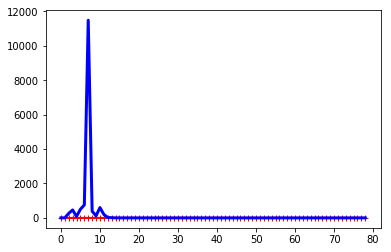

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

This certainly looks different... there are two things to note!

- The error on the training data is much lower then with Linear Regression
- There is a gap between the curves. This means that hte model performs significantly better on training data than validation data, the hallmark of an overfitting model. However, if you used a much larger training set , the two curves would continue to get closer.

(One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error!)

Bias = Underfit
Variance = Overfit
Irreducible error = Bad data

See book for more details!

## Regularized Linear Models

### Ridge Regression
Also called _Tikhonov Regularization_ is a regularized version of Linear Regression, a _regularization term_ is added to the cost function. This forces the weights to be as small as possible. Once trained, you want to evaluate it using the unregularized performance measure.

The hyper parameter a regularizes the model.

It's important to scale the data before using Ridge Regression!!!

As with Linear Regression, we can preform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent.

Here's how to perform Ridge Regression with Scikit using closed-form solutions!!!

In [19]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.60997315]])

And using Stochastic Gradient Descent (NOTE, looke into Stochastic Average GD!)

In [21]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.60552926])

## Lasso Regression
_Least Absolute Shrinkage and Slection Operator Regression_ (simply called _Lasso Regression_) is yet another regularied version of Linear Regression.

An important feature of Lasso Regression is that it completely eliminates the weights of the least important features! It automagically performs feature seleciton and outputs a _sparse model_.

Here's a quck Scikit code sample!

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.54555679])

## Elastic Net
'Tis the middle ground between Ridge Regression and Lasso Regression. You controll the mix raito _r_! When _r_ = 0, Elastic Net is equivalent to Ridge Regression, and when _r_ = 1, Elastic Net is equivalent to Lasso Regression.

So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It's most preferable to have at least some regularization, so avoid Linear Regression. Ridge is a good first pick, but if you suspect only a few features are useful, you should prefer Lasso or Elastic Net since the tend to reduce the useless features' weights down to zero. Note Elatic Net is preferd over Lasso since Lasso may behave erratically when number of features is greater than number of training instances or when several features are strongly correlated.

Here's some Elastic Net for ya!

In [23]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.54930176])

## Early Stopping
One way to regularize algorithms like Gradient Descent is to stop training as soon as the validation error reaches the minimum. This is called _early stopping_. Some guy calls this "beautiful free lunch."

Here's some basic early stopping.

In [26]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(10000):
    # TODO: Find where the heck this came from
    sgd_reg.fit(X_train_polly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/home/marflo356/.local/share/virtualenvs/ml-sci-ten-3-cs4uhT/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


ValueError: bad input shape ()

## Logistic Regression
Also called _Logit Regression_ is mostly used to estimate the probability that an instance belongs to a class. If the prob is greater than 50%, it's in that class! Otherwise, it's out! This makes it a binary classifier.

It outputs a logistic, also know as the _logit_.

The bad news of Logistic Regression is that there is no known closed form :(. The good news is that the cost function is convex, so any optimization algorithm is guaranteed to find the global minimum!
## Decision Boundaries
Let's use the Iris Dataset to demonstrat Logistic Regression.
First, let's detect the Iris-Virginica type only based on the pedal width feature.

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
print("Features: ", list(iris.keys()))
X = iris["data"][:, 3:]  # Pedal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Viginica, else 0

Features:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']


Now let's train a Logistic Regression Model!

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's look at the model's estimated probabilites!

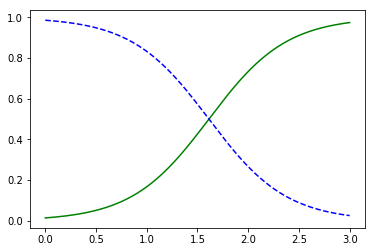

In [29]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

There's a decision boundary at about 1.6 cm! Let's try it!

In [30]:
print("Predictions: ", log_reg.predict([[1.7], [1.5]]))

Predictions:  [1 0]


## Softmax Regression
Logistic Regression can be generalized to support multiple classes directly. This is called _Softmax Regression_, or _Multinomial Logistic Regression_.

The cost function for this guy is _cross entropy_. Please refer to the book for more info!

In [31]:
X = iris["data"][:, (2, 3)]  # Pedal length, pedal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Some quick predictions

In [32]:
print("Predicted class: ", softmax_reg.predict([[5, 2]]))
print("Predicted proba: ", softmax_reg.predict_proba([[5, 2]]))

Predicted class:  [2]
Predicted proba:  [[6.33134077e-07 5.75276067e-02 9.42471760e-01]]
